In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import dotenv
import requests
from requests.auth import HTTPBasicAuth
import os
from scipy import stats

plt.rcParams["font.family"] = "Arial"
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 12
plt.rcParams["ytick.major.size"] = 12
plt.rcParams["xtick.major.pad"] = 18
plt.rcParams["ytick.major.pad"] = 18
plt.rcParams['axes.linewidth'] = 1.0

dotenv.load_dotenv()

True

In [2]:
issue = pd.read_csv("./data/user_info_1.csv")
issue.head()

,username,star,created_at,updated_at,elapsed_time,star_per_day,star_per_day_biased,issue_count,issue_per_day_biased
0,collymore,8,2009-02-19 16:16:06,2020-09-26 11:37:56,4236,0.001889,0.001889,7,0.001653
1,sujanucsc,9,2009-03-12 16:20:20,2020-08-16 18:30:00,4175,0.002156,0.002156,0,0.000000
2,Theorem,0,2018-03-15 21:04:11,2020-07-28 05:07:27,865,0.000000,0.000000,0,0.000000
3,mussawir20,1,2009-05-03 00:01:17,2020-09-18 14:41:17,4156,0.000241,0.000241,0,0.000000
4,bytheway,958,2008-04-04 17:43:29,2020-09-24 13:30:55,4555,0.210318,0.210318,11,0.002415


In [6]:
def func(x):
    bias = 0 if x.elapsed_time > 1000 else 1000 - x.elapsed_time
    
    return x.issue_count / (bias + x.elapsed_time)

issue["issue_per_day_biased"] = issue.apply(func, axis=1)

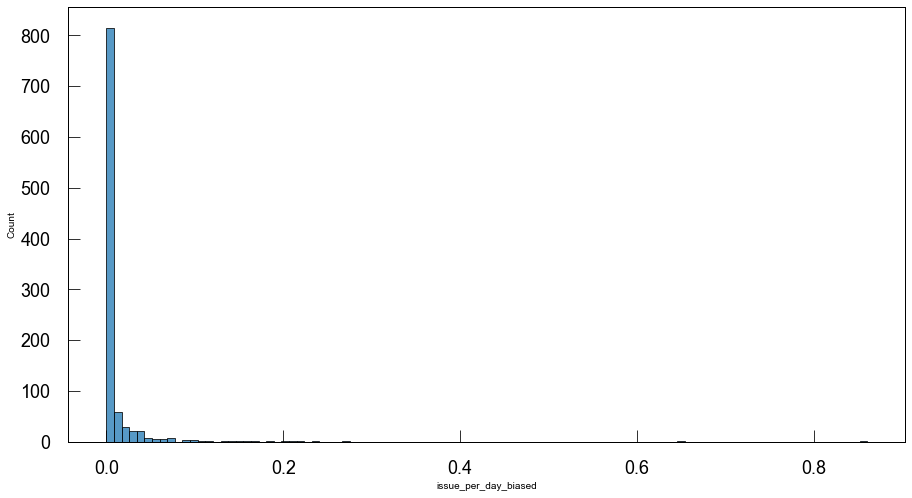

In [25]:
plt.figure(figsize=(15, 8))
sns.histplot(issue.issue_per_day_biased, bins=100)
plt.show()

極端に分布が左に寄っている。偏差値をスコアとして使うためには正規分布に近づける必要がある。変数変換の手法としてロジット変換があるのでそれを用いる

$$
    x \rightarrow \displaystyle \log\frac{x}{1-x}
$$

In [7]:
max(issue.issue_per_day_biased)

0.8600877192982456

一日あたりの Issue 数は最初から 0~1 の範囲に収まっているので正規化は必要ない

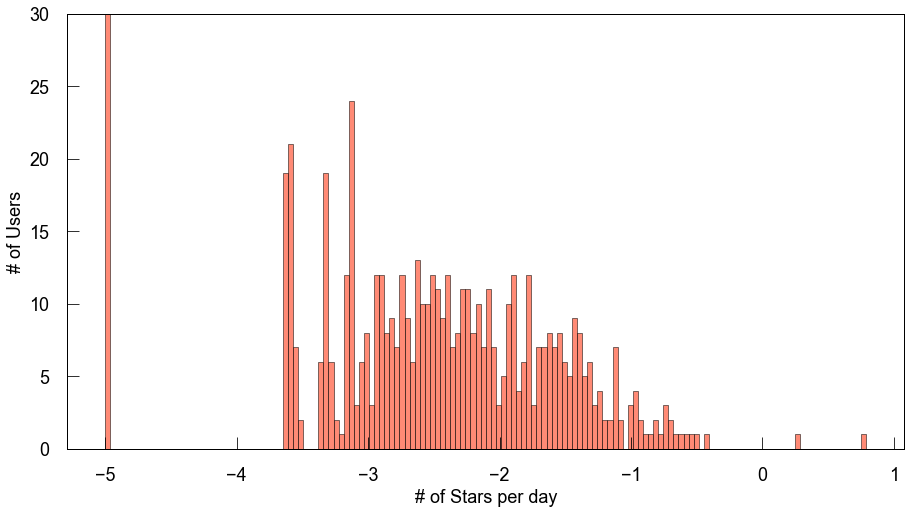

In [27]:
s = issue.issue_per_day_biased + 1e-5  # 0 で発散しないようにする

plt.figure(figsize=(15,8))
sns.histplot(np.log10(s/(1-s)), bins=150, color="tomato")
plt.xlabel("# of Stars per day", fontsize=18)
plt.ylabel("# of Users", fontsize=18)
#plt.xlim(0, 0.2)
plt.ylim(0, 30)
#plt.savefig("./issue_per_day.svg", transparent=True)
plt.show()

In [22]:
s = issue[issue.issue_count > 0].issue_per_day_biased

In [23]:
print(f"Stdev biased: {stats.tstd(np.log10(s/(1-s))):.4}")
print(f"Mean: {np.log10(s/(1-s)).mean():.4}")
print(f"Median: {np.log10(s/(1-s)).median():.4}")

Stdev biased: 0.7849
Mean: -2.377
Median: -2.444
